*P.S.*

*В данной работе используются заготовки функций любезно предоставленные преподователем для учебных целей. Все алгоритмы являются учебными и не являются моей интерелектуальной разработкой. Спасибо.*

# Домашнее задание 5. Градиентный спуск. (10 баллов + 2.5 бонус)

В этом домашнем задании вы напишете градиентный спуск для линейной регрессии, а так же посмотрите, как он ведёт себя с разными параметрами и разными функциями потерь.

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

In [40]:
from typing import List, Iterable

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools

import warnings
warnings.filterwarnings('ignore')

## Часть 1. Градиентный спуск (5 баллов)

Для начала давайте вспомним самый простой функционал ошибки, который мы применяем в задаче регрессии — Mean Squared Error:

$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2
$$

где $x_i$ — это $i$-ый объект датасета, $y_i$ — правильный ответ для $i$-го объекта, а $w$ — веса нашей линейной модели.

Как мы помним, для линейной модели, его можно записать в матричном виде вот так:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2
$$

где $X$ — это матрица объекты-признаки, а $y$ — вектор правильных ответов

Для того чтобы воспользоваться методом градиентного спуска, нам нужно посчитать градиент нашего функционала. Для MSE он будет выглядеть так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y)
$$

Ниже приведён базовый класс `BaseLoss`, который мы будем использовать для реализации всех наших лоссов. Менять его не нужно. У него есть два абстрактных метода:
1. Метод `calc_loss`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять значения лосса
2. Метод `calc_grad`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять значения градиента (вектор)

In [41]:
import abc

class BaseLoss(abc.ABC):
    """Базовый класс лосса"""
    @abc.abstractmethod
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        raise NotImplementedError

    @abc.abstractmethod
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        raise NotImplementedError

Теперь давайте напишем реализацию этого абстрактоного класса: Mean Squared Error лосс.

**Задание 1.1 (5/8 балла):** Реализуйте класс `MSELoss`

Он должен вычислять лосс и градиент по формулам наверху

In [42]:
class MSELoss(BaseLoss):
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        # -- YOUR CODE HERE --
        # Вычислите значение функции потерь при помощи X, y и w и верните его
        l = len(X)
        return (1/l)*(np.linalg.norm(np.dot(X, w)-y)**2)
        
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        # -- YOUR CODE HERE --
        # Вычислите значение вектора градиента при помощи X, y и w и верните его
        l = len(X)
        m = np.dot(X, w)-y
        return (2/l)*np.dot(X.T, m)
        
        

Теперь мы можем создать объект `MSELoss` и при помощи него вычислять значение нашей функции потерь и градиенты:

In [43]:
# Создадим объект лосса
loss = MSELoss()

# Создадим какой-то датасет
X = np.arange(200).reshape(20, 10)
y = np.arange(20)

# Создадим какой-то вектор весов
w = np.arange(10)

# Выведем значение лосса и градиента на этом датасете с этим вектором весов
print(loss.calc_loss(X, y, w))
print(loss.calc_grad(X, y, w))

# Проверка, что методы реализованы правильно
assert loss.calc_loss(X, y, w) == 27410283.5, "Метод calc_loss реализован неверно"
assert np.allclose(loss.calc_grad(X, y, w), np.array([1163180., 1172281., 1181382., 1190483., 
                                                      1199584., 1208685., 1217786., 1226887., 
                                                      1235988., 1245089.])), "Метод calc_grad реализован неверно"
print("Всё верно!")

27410283.5
[1163180. 1172281. 1181382. 1190483. 1199584. 1208685. 1217786. 1226887.
 1235988. 1245089.]
Всё верно!


Теперь когда у нас есть всё для вычисления градиента, давайте напишем наш градиентный спуск. Напомним, что формула для одной итерации градиентного спуска выглядит следующим образом:

$$
w^t = w^{t-1} - \eta \nabla_{w} Q(w^{t-1}, X, y)
$$

Где $w^t$ — значение вектора весов на $t$-ой итерации, а $\eta$ — параметр learning rate, отвечающий за размер шага.

**Задание 1.2 (5/8 балла):** Реализуйте функцию `gradient_descent`

Функция должна принимать на вход начальное значение весов линейной модели `w_init`, матрицу объектов-признаков `X`, 
вектор правильных ответов `y`, объект функции потерь `loss`, размер шага `lr` и количество итераций `n_iterations`.

Функция должна реализовывать цикл, в котором происходит шаг градиентного спуска (градиенты берутся из `loss` посредством вызова метода `calc_grad`) по формуле выше и возвращать 
траекторию спуска (список из новых значений весов на каждом шаге)

In [79]:
def gradient_descent(w_init: np.ndarray, X: np.ndarray, y: np.ndarray,
                        loss: BaseLoss, lr: float = 0.01, n_iterations: int = 1000) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    # -- YOUR CODE HERE --
    sp = list()
    W = w_init.copy()
    sp.append(W)
    i = 0
    while i != n_iterations:
        W = W - lr * loss.calc_grad(X, y, W)
        sp.append(W)
        i += 1
    print('sp', sp)
    return sp
    

Теперь создадим синтетический датасет и функцию, которая будет рисовать траекторию градиентного спуска по истории:

In [80]:
# Создаём датасет из двух переменных и реального вектора зависимости w_true

np.random.seed(1337)

# число переменных
n_features = 2
# число наблюдений (объектов)
n_objects = 300
batch_size = 10
num_steps = 43

# формируем какие то истинные значения весов
w_true = np.random.normal(size=(n_features, ))

# формируем какието значения признаков
X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :]

# истинные наблюдения получаются путем добавления шума к модельны данным.
y = X.dot(w_true) + np.random.normal(0, 1, (n_objects))

print(X.shape)
print(y.shape)
print(w_true)

(300, 2)
(300,)
[-0.70318731 -0.49028236]


In [82]:
# создаем класс
loss = MSELoss()
# берем два любых начальных знаяения весов
w_init = np.array([2, 2])

# получим историю поведения гр спуска
w_list = gradient_descent(w_init, X, y, loss, 0.01, 100)

print(loss.calc_loss(X, y, w_list[0]))
print(loss.calc_loss(X, y, w_list[-1]).round(5))
print(w_list[-1])
print(loss.calc_loss(X, y, w_true).round(5))

sp [array([2, 2]), array([ 1.61652971, -1.93818281]), array([1.24889381, 0.39472679]), array([ 0.96345573, -0.99377309]), array([ 0.70673159, -0.17289868]), array([ 0.49853993, -0.66286361]), array([ 0.31702697, -0.37437777]), array([ 0.16662567, -0.54757126]), array([ 0.03748074, -0.44643957]), array([-0.07067086, -0.5078731 ]), array([-0.16284492, -0.47260189]), array([-0.24044044, -0.49454487]), array([-0.30632971, -0.48237411]), array([-0.36194083, -0.49031974]), array([-0.40907695, -0.48621452]), array([-0.44891073, -0.48916791]), array([-0.48264391, -0.48785224]), array([-0.51116893, -0.48900312]), array([-0.53531473, -0.48863309]), array([-0.55573886, -0.48911759]), array([-0.5730237 , -0.48905414]), array([-0.5876466 , -0.48928143]), array([-0.60002057, -0.48930697]), array([-0.61048967, -0.48942757]), array([-0.61934821, -0.48947086]), array([-0.62684333, -0.48954236]), array([-0.63318524, -0.48958216]), array([-0.63855116, -0.48962812]), array([-0.64309143, -0.48965971]), arr

In [47]:
# что бы каждый раз для прорисовке графика не запускать функцию определения сетки,
# выведем ее из под процедуры рисования,
#  и запустим только 1н раз.

def meshgrid_level(loss: BaseLoss): # создадим сетку из значений функции ошибки
    # выделим диапазон весов по которым посчитаются все знаяения ф-ции ошибки
    # данная функция влияет на прорисовку границ сетки
    # число интервалов  влияет на плавность линий сетки
    meshgrid_space = np.linspace(-10, 10, 200)
    # два двумерных массива
    A, B = np.meshgrid(meshgrid_space, meshgrid_space)
    # создаем заготовку для будущего массива, похожего на А
    levels = np.empty_like(A)
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            # перебираем все пары значений весов
            w_tmp = np.array([A[i, j], B[i, j]])
            # для каждой пары весов считаем свой уровень ошибки
            levels[i, j] = loss.calc_loss(X, y, w_tmp)

    return A, B, levels


In [48]:

def plot_gd(w_list: Iterable, lable, *meshgr_lev):
    """
    Функция для отрисовки траектории градиентного спуска
    :param w_list: Список из объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать лосс при помощи loss.calc_loss(X, y, w)
    """
    w_list = np.array(w_list)

    #fig = plt.figure(figsize=(7, 7))
    plt.title(lable)
    plt.xlabel(r'$w_1$')
    plt.ylabel(r'$w_2$')
    lim_min=min(w_list[:, 0].min(), w_list[:, 1].min()) - 1
    lim_max=max(w_list[:, 0].max(), w_list[:, 1].max()) + 1
    plt.xlim(lim_min, lim_max)
    plt.ylim(lim_min, lim_max)
    # если осей нет нарисуйте их
    # установите соотношение масштабов осей одинаковым (чтобы рисовался квадратик)
    plt.gca().set_aspect('equal')

    # наносит контурные линии
    CS = plt.contour(meshgr_lev[0], meshgr_lev[1], # A B координаты в которых прорисовывается будущий контур
                     # (двумерные в одном формате с "уровнями") по сути сетка
                     meshgr_lev[2], # levels - значения (типа Z) уровня по которому рисуется контур
                     # есть "области определения" w на которых level одинаковый - он будет прорисовываться на координатах w
                     # уровень который нужно прорисовать указывается в level=
                     levels=np.logspace(-3, 3, num=25), #Опред кол и положение контурных линий
                     # Если это массив, рисует контурные линии на указанных уровнях. Значения должны быть в порядке возрастания.
                     cmap=plt.cm.rainbow_r, #Карта цветов отображает значения уровня в цветах.
                     extend='both') # определяет окраску значений контура, которые находятся за пределами диапазона уровней
    CB = plt.colorbar(CS, shrink=0.8)

    # рисует точки
    plt.scatter(w_list[:, 0], w_list[:, 1], s=10)
    # рисует линию
    plt.plot(w_list[:, 0], w_list[:, 1])

    #plt.show()

**Задание 1.3 (5/8 балла):** При помощи функций `gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`). Используйте не менее четырёх разных значений для `lr`. 

Сделайте и опишите свои выводы о том, как параметр `lr` влияет на поведение градиентного спуска

Подсказки:
* Функция `gradient_descent` возвращает историю весов, которую нужно подать в функцию `plot_gd`
* Хорошие значения для `lr` могут лежать в промежутке от 0.0001 до 0.1

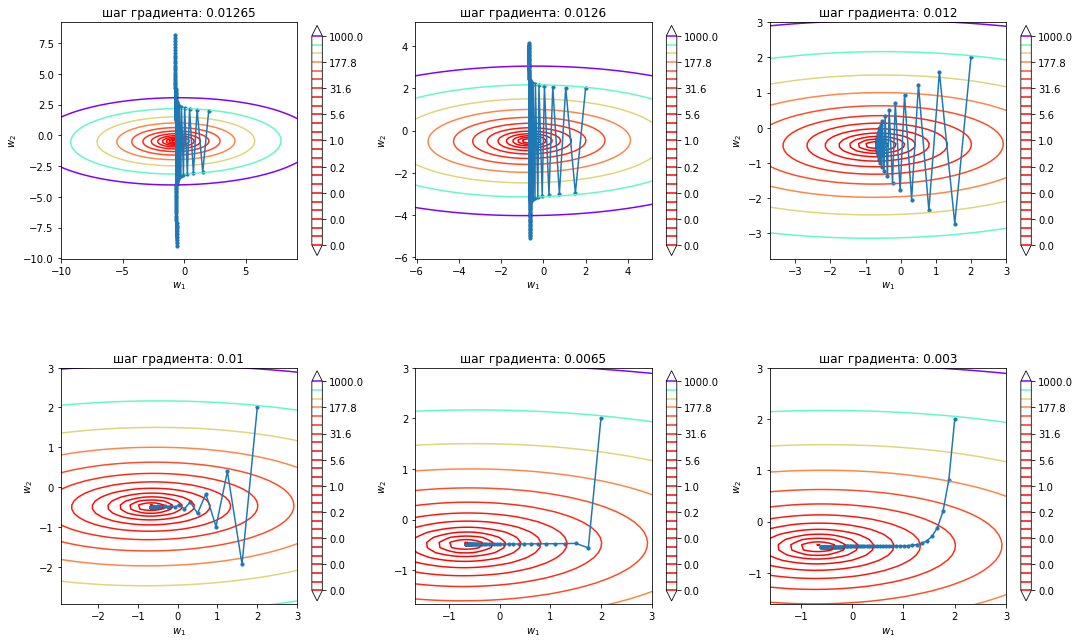

In [49]:
# 0.01265 - это наибольшее адекватное знаяение шага, после него градинент перепрыгивает мимнимум.

list_lr = [0.01265, 0.0126, 0.012, 0.01, 0.0065, 0.003]
mesh_level = meshgrid_level(loss)

fig = plt.figure(figsize=(18,18))
gs = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
labels = ['шаг градиента: ' + str(i) for i in list_lr]

for lr, lab, grd in zip(list_lr,
                        labels,
                        list(itertools.product([0, 1, 2], repeat=2))):
    w_list = gradient_descent(w_init, X, y, loss, lr, 80)
    ax = plt.subplot(gs[grd[0], grd[1]])
    plot_gd(w_list, lab, *mesh_level)

plt.show()

*На первом и втором графике мы наблюдаем как градиентный спуск перепрыгивает через минимум, не попадая в него, из-за большого **lr**  . Третий график хорошо показывает как градиентный спуск, постоянно перепрыгивая через минимум, все же достигает его. Четвертый и пятый графики (особенно пятый) свидетельствую об оптимальности шага для быстрого достижения минимума.*

Теперь реализуем стохастический градиентный спуск

**Задание 1.4 (5/8 балла):** Реализуйте функцию `stochastic_gradient_descent`

Функция должна принимать все те же параметры, что и функция `gradient_descent`, но ещё параметр `batch_size`, отвечающий за размер батча. 

Функция должна как и раньше реализовывать цикл, в котором происходит шаг градиентного спуска, но на каждом шаге считать градиент не по всей выборке `X`, а только по случайно выбранной части.

Подсказка: для выбора случайной части можно использовать [`np.random.choice`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html) с правильным параметром `size`, чтобы выбрать случайные индексы, а потом проиндексировать получившимся массивом массив `X`:
```
batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
batch = X[batch_indices]
```

In [50]:
def stochastic_gradient_descent(w_init: np.ndarray, X: np.ndarray, y: np.ndarray, 
                        loss: BaseLoss, lr: float, batch_size: int, n_iterations: int = 1000) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    sp = list()
    W = w_init
    sp.append(W)
    i = 0
    while i != n_iterations:
        batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
        batchX = X[batch_indices]
        batchY = y[batch_indices]
        W = W - lr * loss.calc_grad(batchX, batchY, W)
        sp.append(W)
        i += 1

    return sp

**Задание 1.5 (5/8 балла):** При помощи функций `stochastic_gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`) и размера подвыборки (параметра `batch_size`). Используйте не менее четырёх разных значений для `lr` и `batch_size`. 

Сделайте и опишите свои выводы о том, как параметры  `lr` и `batch_size` влияют на поведение стохастического градиентного спуска. Как отличается поведение стохастического градиентного спуска от обычного?

Обратите внимание, что в нашем датасете всего 300 объектов, так что `batch_size` больше этого числа не будет иметь смысла.

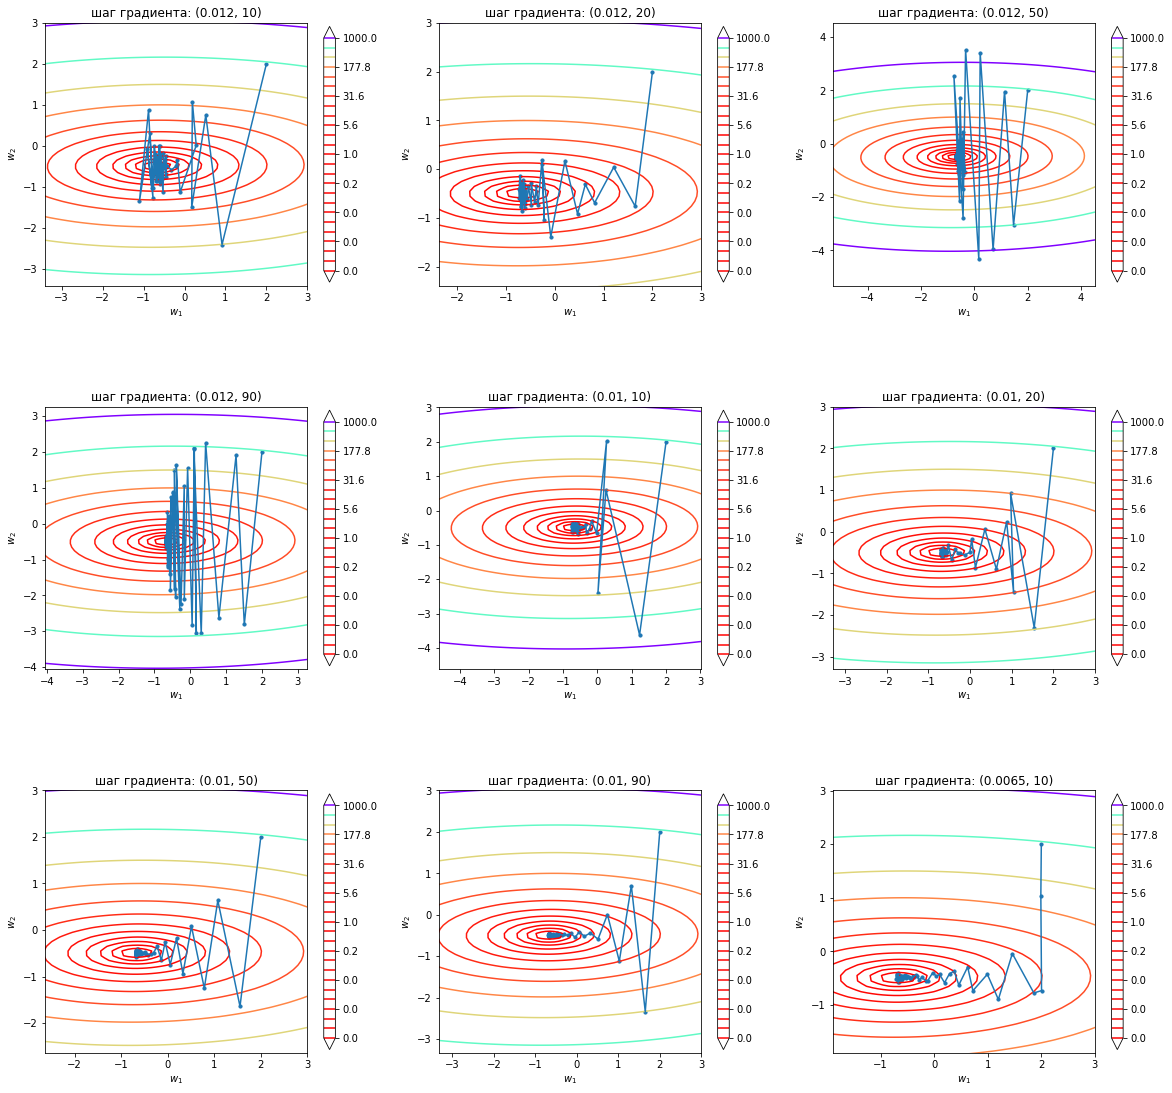

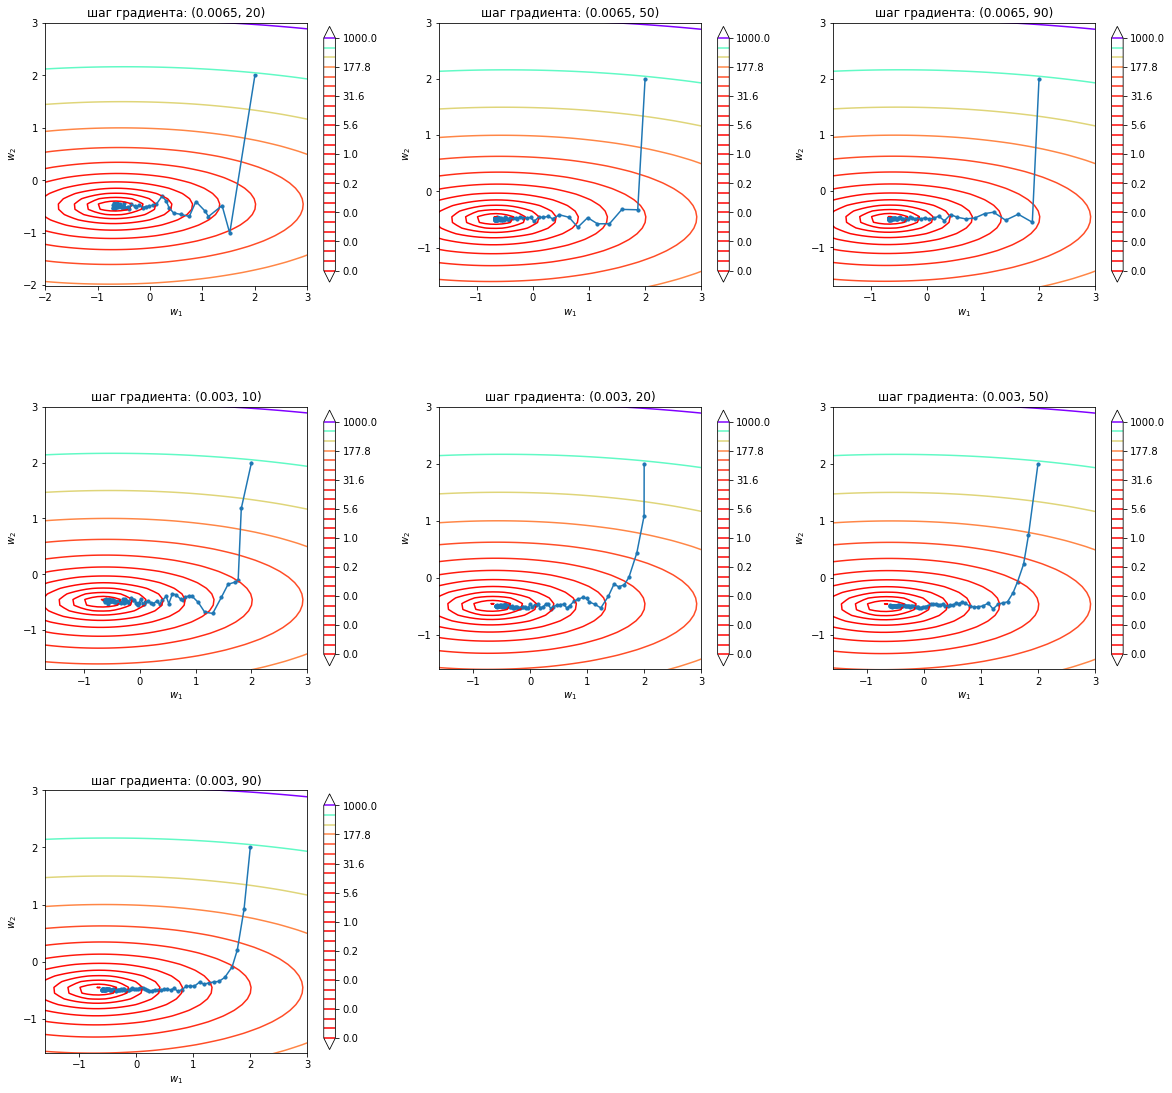

In [51]:
#0.01265
def get_lr_batch_list(lr, batch_size):
    return list(itertools.product(lr, batch_size))

list_lr = [0.012, 0.01, 0.0065, 0.003]
list_batch_size = [10, 20, 50, 90]
mesh_level = meshgrid_level(loss)

# нам придется нарисовать 16 графиков, при том что мне удобно выводить по 9 или 8мь графиков за раз
# поэтому разобъем вывод на 2 части

# часть 1
fig = plt.figure(figsize=(20,20))
gs = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
labels = ['шаг градиента: ' + str(i) for i in get_lr_batch_list(list_lr, list_batch_size)[:9]]

for params, lab, grd in zip(get_lr_batch_list(list_lr, list_batch_size)[:9],
                            labels,
                            list(itertools.product([0, 1, 2], repeat=2))):
    w_list = stochastic_gradient_descent(w_init, X, y, loss, params[0], params[1], 80)
    ax = plt.subplot(gs[grd[0], grd[1]])
    plot_gd(w_list, lab, *mesh_level)

plt.show()

# часть 2
fig = plt.figure(figsize=(20,20))
gs = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
labels = ['шаг градиента: ' + str(i) for i in get_lr_batch_list(list_lr, list_batch_size)[9:]]

for params, lab, grd in zip(get_lr_batch_list(list_lr, list_batch_size)[9:],
                            labels,
                            list(itertools.product([0, 1, 2], repeat=2))):
    w_list = stochastic_gradient_descent(w_init, X, y, loss, params[0], params[1], 80)
    ax = plt.subplot(gs[grd[0], grd[1]])
    plot_gd(w_list, lab, *mesh_level)

plt.show()

Вы могли заметить, что поведение градиентного спуска, особенно стохастической версии, очень сильно зависит от размера шага. 

Как правило, в начале спуска мы хотим делать большие шаги, чтобы поскорее подойти поближе к минимуму, а позже мы уже хотим делать шаги маленькие, чтобы более точнее этого минимума достичь и не "перепрыгнуть" его. 

Чтобы достичь такого поведения мы можем постепенно уменьшать длину шага с увеличением номера итерации. Сделать это можно, например, вычисляя на каждой итерации длину шага по следующей формуле:

$$
    \eta_t
    =
    \lambda
    \left(
        \frac{s_0}{s_0 + t}
    \right)^p
$$

где $\eta_t$ — длина шага на итерации $t$, $\lambda$ — начальная длина шага (параметр `lr` у нас), $s_0$ и $p$ — настраиваемые параметры.

**Задание 1.6 (5/8 балла):** Реализуйте функцию `stochastic_gradient_descent` на этот раз с затухающим шагом по формуле выше. Параметр $s_0$ возьмите равным 1. Параметр $p$ возьмите из нового аргумента функции `p`.

In [52]:
def stochastic_gradient_descent2(w_init: np.ndarray, X: np.ndarray, y: np.ndarray,
                        loss: BaseLoss, lr: float, batch_size: int, p: float, n_iterations: int = 1000) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param p: float -- значение степени в формуле затухания длины шага
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    # -- YOUR CODE HERE --
    s0 = 1
    sp = list()
    W = w_init
    sp.append(W)
    i = 0
    while i != n_iterations:
        batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
        batchX = X[batch_indices]
        batchY = y[batch_indices]
        lr_des = lr * pow(p,s0/(s0+i))
        W = W - lr_des * loss.calc_grad(batchX, batchY, W)
        sp.append(W)
        i += 1

    return sp

**Задание 1.7 (5/8 балла):** При помощи новой функции `stochastic_gradient_descent` и функции `plot_gd` нарисуйте траекторию градиентного спуска для разных значений параметра `p`. Используйте не менее четырёх разных значений для `p`. Хорошими могут быть значения, лежащие в промежутке от 0.1 до 1.
Параметр `lr` возьмите равным 0.01, а параметр `batch_size` равным 10.

Сделайте и опишите свои выводы о том, как параметр `p` влияет на поведение стохастического градиентного спуска

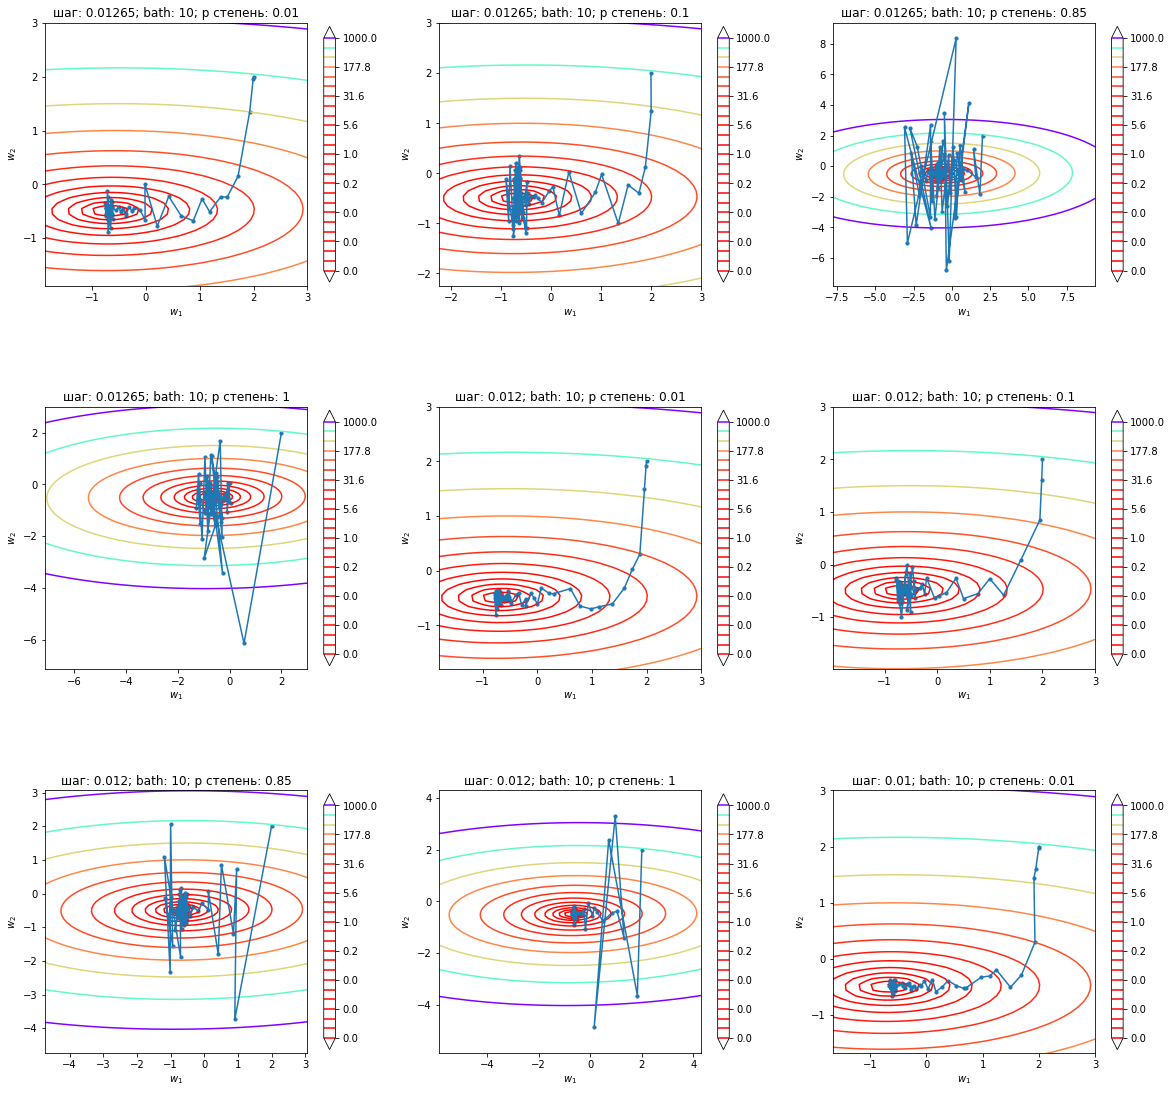

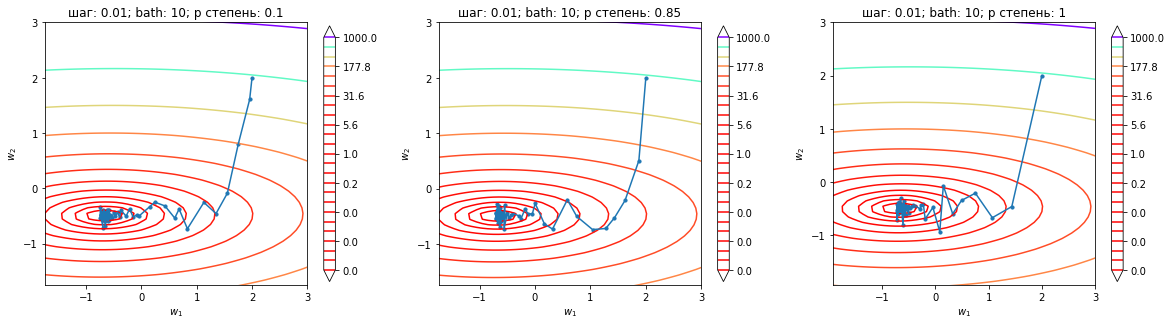

In [53]:
def get_lr_batch_list(lr, batch_size, p):
    return list(itertools.product(lr, batch_size, p))

list_lr = [0.01265, 0.012, 0.01]
list_batch_size = [10]
list_p = [0.01, 0.1, 0.85, 1]
mesh_level = meshgrid_level(loss)

fig = plt.figure(figsize=(20,20))
gs = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
labels = ['шаг: ' + str(i[0]) + '; bath: ' + str(i[1])  + '; p степень: ' + str(i[2])
          for i in get_lr_batch_list(list_lr, list_batch_size, list_p)[:9]]

for params, lab, grd in zip(get_lr_batch_list(list_lr, list_batch_size, list_p)[:9],
                            labels,
                            list(itertools.product([0, 1, 2], repeat=2))):
    w_list = stochastic_gradient_descent2(w_init, X, y, loss, params[0], params[1], params[2],80)
    ax = plt.subplot(gs[grd[0], grd[1]])
    plot_gd(w_list, lab, *mesh_level)

plt.show()

fig = plt.figure(figsize=(20,20))
gs = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
labels = ['шаг: ' + str(i[0]) + '; bath: ' + str(i[1])  + '; p степень: ' + str(i[2])
          for i in get_lr_batch_list(list_lr, list_batch_size, list_p)[9:]]

for params, lab, grd in zip(get_lr_batch_list(list_lr, list_batch_size, list_p)[9:],
                            labels,
                            list(itertools.product([0, 1, 2], repeat=2))):
    w_list = stochastic_gradient_descent2(w_init, X, y, loss, params[0], params[1], params[2], 80)
    ax = plt.subplot(gs[grd[0], grd[1]])
    plot_gd(w_list, lab, *mesh_level)

plt.show()

**Задание 1.8 (5/8 балла):** Сравните сходимость обычного градиентного спуска и стохастичекой версии:
Нарисуйте график зависимости значения лосса (его можно посчитать при помощи метода `calc_loss`, используя $x$ и $y$ из датасета и $w$ с соответствующей итерации) от номера итерации для траекторий, полученных при помощи обычного и стохастического градиентного спуска с одинаковыми параметрами. Параметр `batch_size` возьмите равным 10.

Видно ли на данном графике преимущество SGD? Почему?

In [54]:
# посчитаем ошибку для каждого шага градиента

def convergence_loss(w_list: np.ndarray, X: np.ndarray, y: np.ndarray, loss: BaseLoss, _round_=5) -> List[float]:
    # -- YOUR CODE HERE --
    los_list = list()
    n_iterations = len(w_list)
    i = 0
    while i != n_iterations:
        los_vol = loss.calc_loss(X, y, w_list[i]).round(_round_)
        los_list.append(los_vol)
        i += 1
    return los_list

In [55]:
# процедура прорисовки функции ошибки
# бужем выводить ошибку на логарифмическом масштебе (по оси У) 
# т.к. есть значения ошибки очень большие и гарфик не удобно "читать"

def plot_conv_loss(loss_list1: Iterable, loss_list2: Iterable, leg: list):
    loss_list1 = np.array(loss_list1)
    loss_list2 = np.array(loss_list2)

    lable = 'Сходимость ошибки'
    fig = plt.figure(figsize=(8, 8))

    plt.title(lable)
    plt.xlabel(r'$номер итерации$')
    plt.ylabel(r'$ошибка$')
    Xlim_min=0
    Xlim_max=max(len(loss_list1), len(loss_list2))
    plt.xlim(Xlim_min, Xlim_max)

    plt.yscale('log',base=10)
    plt.plot(loss_list1)
    plt.plot(loss_list2)
    plt.legend(leg)

    plt.show()

*отвечая на вопрос задачи. Честно сказать я думал что стахастический гр спуск будет способствовать более быстрому снижению знаяения ошибки, а по факту получается что эффективность обичения у обоих методов одтинаковая, за тем исклчением что SDG использует меньшее число наблюдений и вероятнее всего на очень больших данных более быстрый.* 

***При этом нельзя не отметить что значение ошибки очень не стабильно и имеет скорее интервальную оценку, а не точную***

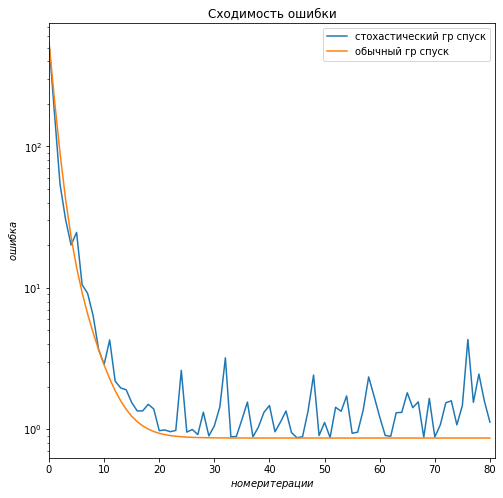

In [56]:
lr = (0.01 , 0.0065)
w_list1 = stochastic_gradient_descent(w_init, X, y, loss, lr[0], 10, n_iterations=80)
w_list2 = gradient_descent(w_init, X, y, loss, lr[0], n_iterations=80)

plot_conv_loss(convergence_loss(w_list1, X, y, loss),
               convergence_loss(w_list2, X, y, loss),
               ['стохастический гр спуск', 'обычный гр спуск'])

## Часть 2. Линейная регрессия (5 баллов)

Теперь давайте напишем наш класс для линейной регрессии. Он будет использовать интерфейс, знакомый нам из библиотеки `sklearn`.

В методе `fit` мы будем подбирать веса `w` при помощи градиентного спуска нашим методом `gradient_descent`

В методе `predict` мы будем применять нашу регрессию к датасету, 

**Задание 2.1 (5/8 балла):** Допишите код в методах `fit` и `predict` класса `LinearRegression`

В методе `fit` вам нужно как-то инициализировать веса `w`, применить `gradient_descent` и сохранить последнюю `w` из траектории.

В методе `predict` вам нужно применить линейную регрессию и вернуть вектор ответов.

Обратите внимание, что объект лосса передаётся в момент инициализации и хранится в `self.loss`. Его нужно использовать в `fit` для `gradient_descent`.

In [57]:
class LinearRegression:
    def __init__(self, loss: BaseLoss, _lr_ = 0.01, _n_iter_ = 300) -> None:
        self.loss = loss
        self.lr = _lr_
        self.n_iter = _n_iter_
        self.Xfit = np.NaN
        self.yfit = np.NaN
        self.w_init = np.NaN
        self.w_hist = np.NaN
        self.w = np.NaN

    # тут наверно определие типа не корректно, т.к. данные - ДатаФрейм X_data: np.ndarray
    def fit(self, X_data: np.ndarray, y_data: np.ndarray) -> 'LinearRegression':
        self.Xfit = np.array(X_data)
        self.yfit = np.array(y_data)
        # Добавляем столбец из единиц для константного признака
        self.Xfit = np.hstack([self.Xfit, np.ones([self.Xfit.shape[0], 1])])
        self.w_init = np.random.uniform(-1, 1, self.Xfit.shape[1])
        self.w_hist = gradient_descent(self.w_init, self.Xfit, self.yfit, self.loss, self.lr, n_iterations=self.n_iter)
        self.w = self.w_hist[-1]
        return self
    
    def predict(self, X_data: np.ndarray) -> np.ndarray:
        # Проверяем, что регрессия обучена, то есть, что был вызван fit и в нём был установлен атрибут self.w
        assert hasattr(self, "w"), "Linear regression must be fitted first"
        # Добавляем столбец из единиц для константного признака
        X_ = np.array(X_data)
        X_ = np.hstack([X_, np.ones([X_.shape[0], 1])])
        return np.dot(X_, self.w)

Теперь у нас есть наш класс линейной регрессии. Более того, мы можем управлять тем, какую функцию потерь мы оптимизируем, просто передавая разные классы в параметр `loss` при инициализации. 

Пока у нас нет никаких классов кроме `MSELoss`, но скоро они появятся.

Для `MSELoss` мы бы создавали наш объект линейной регрессии, например, так:

In [58]:
linear_regression = LinearRegression(loss)

Применим нашу регрессию на реальном датасете. Загрузим датасет с машинами, который был у вас на семинарах:

In [59]:
# получим датасет

X_raw = pd.read_csv(
    "http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data", 
    header=None, 
    na_values=["?"]
)
X_raw = X_raw[~X_raw[25].isna()].reset_index().drop('index', axis=1)
X_raw.head(5)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


**Задание 2.2 (5/8 балла):** Как обычно обработайте датасет всеми нужными методами, чтобы на нём можно было обучать линейную регрессию:

* Заполните пропуски
* Разделите датасет на обучающую и тестовую выборку
* Нормализуйте числовые признаки
* Закодируйте категориальные переменные

In [60]:
# заменим знак вопроса на пропущеное знаяение

X_raw.replace(['?'], np.nan, inplace=True)
X_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       201 non-null    int64  
 1   1       164 non-null    float64
 2   2       201 non-null    object 
 3   3       201 non-null    object 
 4   4       201 non-null    object 
 5   5       199 non-null    object 
 6   6       201 non-null    object 
 7   7       201 non-null    object 
 8   8       201 non-null    object 
 9   9       201 non-null    float64
 10  10      201 non-null    float64
 11  11      201 non-null    float64
 12  12      201 non-null    float64
 13  13      201 non-null    int64  
 14  14      201 non-null    object 
 15  15      201 non-null    object 
 16  16      201 non-null    int64  
 17  17      201 non-null    object 
 18  18      197 non-null    float64
 19  19      197 non-null    float64
 20  20      201 non-null    float64
 21  21      199 non-null    float64
 22  22

In [61]:
# удалим строки с пропущенными значениями
# колонку 1 - удаляем совсем - в ней почти половина наблюдений с пропускамм

if 1 in X_raw.columns:
    X_raw = X_raw.drop(1, axis=1)
X_raw = X_raw.dropna(subset=[5, 18, 19, 21, 22], axis=0)
X_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 0 to 200
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       193 non-null    int64  
 1   2       193 non-null    object 
 2   3       193 non-null    object 
 3   4       193 non-null    object 
 4   5       193 non-null    object 
 5   6       193 non-null    object 
 6   7       193 non-null    object 
 7   8       193 non-null    object 
 8   9       193 non-null    float64
 9   10      193 non-null    float64
 10  11      193 non-null    float64
 11  12      193 non-null    float64
 12  13      193 non-null    int64  
 13  14      193 non-null    object 
 14  15      193 non-null    object 
 15  16      193 non-null    int64  
 16  17      193 non-null    object 
 17  18      193 non-null    float64
 18  19      193 non-null    float64
 19  20      193 non-null    float64
 20  21      193 non-null    float64
 21  22      193 non-null    float64
 22  23

In [62]:
from category_encoders.quantile_encoder import QuantileEncoder

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline


In [63]:
# ФУНКЦИЯ ВЗЯТА ИЗ СЕМИНАРА и немного изменена
from sklearn.base import TransformerMixin
from sklearn.preprocessing import StandardScaler

class CustomScalerTransformer(TransformerMixin):
    def __init__(self, cols, scaler=StandardScaler(), exclude=[], leave=[]):
        super().__init__()
        self.leave = leave
        self.exclude = exclude
        self.cols = cols
        # назначаем метод Скалер
        self.scaler = scaler

    def fit(self, X, y=None):
        # сохраняем переданные поля
        if bool(len(self.leave)):
            self.exclude = list(set(X.columns) ^ set(self.leave))
        # забираем значения по переданым полям
        num_cols = X.copy()[self.cols]
        # обучаем скалер на этих значениях
        self.scaler.fit(num_cols)
        return self

    def transform(self, X, y=None):
        # копируем ДАтаФрейм
        X_res = X.copy()
        # маштабируем скалером
        num_cols_tr = self.scaler.transform(X_res[self.cols])
        # вот здесь сами руками создаем дата фрейм
        for i, col in enumerate(self.cols):
            X_res[col] = num_cols_tr[:,i]
        # !! уберем определенные на "исключение" столбцы
        return X_res.drop(self.exclude, axis=1) if bool(len(self.exclude)) else X_res

In [64]:
# разделим целевую переменную и признаки

if 25 in X_raw.columns:
    y = X_raw[25]
    X_ = X_raw.drop(25, axis=1)
print(X_.shape)
print(y.shape)

# получим трейн и тест
x_train, x_test, y_train, y_test = train_test_split(X_, y,
                                                    test_size=0.3,
                                                    shuffle=True,
                                                    random_state=151)

# получим список колонок с нечисловыми признаками
col_obj_list = x_train.select_dtypes(exclude = ['object']).columns.tolist()
cols_all = x_train.columns.tolist()


(193, 24)
(193,)


In [65]:
p_line_standart = Pipeline([
    # переводит категории в числовые признаки
    ('quantil_encoder', QuantileEncoder(col_obj_list)),
    # затем все стандартизируем
    ('scaler', CustomScalerTransformer(cols_all))
])

In [66]:
p_line_standart.fit(x_train, y_train)
x_train_st = p_line_standart.transform(x_train)
x_test_st = p_line_standart.transform(x_test)

print('проверка', set(x_train_st.columns) - set(x_test_st.columns))

проверка set()


**Задание 2.3 (5/8 балла):** Обучите написанную вами линейную регрессию на обучающей выборке

In [67]:
# -- YOUR CODE HERE --
loss = MSELoss()
linear_regression = LinearRegression(loss)
lreg = linear_regression.fit(x_train_st, y_train)

pred_train = lreg.predict(x_train_st)
pred_test = lreg.predict(x_test_st)


**Задание 2.4 (5/8 балла):** Посчитайте ошибку обученной регрессии на обучающей и тестовой выборке при помощи метода `mean_squared_error` из `sklearn.metrics`.

In [68]:
# -- YOUR CODE HERE --
print("r2 train: ", r2_score(pred_train, y_train).round(3))
print('mse train: ', mean_squared_error(y_train, pred_train).round(1))

print("r2 test: ", r2_score(pred_test, y_test).round(3))
print('mse test: ', mean_squared_error(y_test, pred_test).round(1))

r2 train:  0.93
mse train:  4437383.4
r2 test:  0.917
mse test:  4636950.4


Наша модель переобучилась. Давайте как обычно в такой ситуации добавим к ней L2 регуляризацию. Для этого нам нужно написать новый класс лосса.

Формула функции потерь для MSE с L2 регуляризацией выглядит так:
$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2 + \lambda ||w||^2
$$

Или в матричном виде:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2 + \lambda ||w||^2
$$

Где $\lambda$ — коэффициент регуляризации

Градиент выглядит так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y) + 2 \lambda w
$$

**Задание 2.5 (5/8 балла):** Реализуйте класс `MSEL2Loss`

Он должен вычислять лосс и градиент по формулам наверху

Подсказка: обратите внимание, что последний элемент вектора `w` — это bias (в классе `LinearRegression` к матрице `X` добавляется колонка из единиц — константный признак). Как мы знаем из лекций и семинаров, bias регуляризовать не нужно. Поэтому не забудьте убрать последний элемент из `w` при подсчёте слагаемого $\lambda||w||^2$ в `calc_loss` и занулить его при подсчёте слагаемого $2 \lambda w$ в `calc_grad`

In [69]:
class MSEL2Loss(BaseLoss):
    def __init__(self, coef: float = 1.):
        """
        :param coef: коэффициент регуляризации (лямбда в формуле)
        """
        self.coef = coef

    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета. Последний признак константный.
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии. Последний вес -- bias.
        :output: число -- значения функции потерь
        """
        l = len(X)
        return (1/l)*(np.linalg.norm(np.dot(X, w)-y)**2) + self.coef * (np.linalg.norm(w[:-1])**2)

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        # -- YOUR CODE HERE --
        # Вычислите значение вектора градиента при помощи X, y и w и верните его
        l = len(X)
        m = np.dot(X, w)-y
        w2 = w.copy()
        w2[-1] = 0
        return (2/l)*np.dot(X.T, m) - 2 * self.coef * w2

Теперь мы можем использовать лосс с l2 регуляризацией в нашей регрессии, например, так:

In [70]:
lossL2 = MSEL2Loss(coef=1)
linear_regressionL2 = LinearRegression(lossL2)
lreg2 = linear_regression.fit(x_train_st, y_train)

pred_train2 = lreg2.predict(x_train_st)
pred_test2 = lreg2.predict(x_test_st)

print("r2 train: ", r2_score(pred_train, y_train).round(3))
print('mse train: ', mean_squared_error(y_train, pred_train).round(1))

print("r2 test: ", r2_score(pred_test, y_test).round(3))
print('mse test: ', mean_squared_error(y_test, pred_test).round(1))


r2 train:  0.93
mse train:  4437383.4
r2 test:  0.917
mse test:  4636950.4


**Задание 2.6 (5/8 балла):** Обучите регрессию с лоссом `MSEL2Loss`. Подберите хороший коэффициент регуляризации и добейтесь улучшения результата на тестовой выборке. Сравните результат на обучающей и тестовой выборке с регрессией без регуляризации. 

In [71]:
n = 100
aa = np.linspace(0.05, 2, n)
mse_best =  mean_squared_error(LinearRegression(MSEL2Loss(coef=aa[0])).fit(x_train_st, y_train).predict(x_train_st),
                   y_train).round(0)
a_best = aa[0]

for a in aa[1:]:
    mse = mean_squared_error(LinearRegression(MSEL2Loss(coef=a)).fit(x_train_st, y_train).predict(x_train_st),
                  y_train).round(0)
    if mse_best > mse:
        mse_best = mse
        a_best = a

print('a_best: ', a_best)

lregL2 = LinearRegression(MSEL2Loss(a_best)).fit(x_train_st, y_train)

pred_trainL2 = lregL2.predict(x_train_st)
pred_testL2 = lregL2.predict(x_test_st)

print("r2 train: ", r2_score(pred_trainL2, y_train).round(5))
print('mse train: ', mean_squared_error(y_train, pred_trainL2).round(1))

print("r2 test: ", r2_score(pred_testL2, y_test).round(5))
print('mse test: ', mean_squared_error(y_test, pred_testL2).round(1))

a_best:  0.08939393939393939
r2 train:  0.93507
mse train:  4315625.4
r2 test:  0.92357
mse test:  4479852.3


*L2 регуляризация дает!! существенное изменение, видно что переобучение уменьшилось, т.к. Ркв. и ошибка стали близки по знаяению у трейн и тест выборок*

В нашем датасете могут быть выбросы. На семинаре вам рассказывали, что с выбросами хорошо помогает бороться Huber Loss. Вдали от нуля он работает как Mean Absolute Error и не реагирует на выбросы так сильно, как MSE. Давайте его реализуем и применим в нашей регрессии.

Напомним, что функция потерь Huber Loss'а  выглядит так:


$$
    Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \phi_\varepsilon(z) = \begin{cases} \frac 1 2 z^2, - \varepsilon < z < \varepsilon, \\\varepsilon (|z| - \frac 1 2 \varepsilon), иначе \\ \end{cases}
$$


А градиент так:
$$
    \nabla_w Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell x_i \nabla_z \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \nabla_z \phi_\varepsilon(z) = \begin{cases} z, - \varepsilon < z < \varepsilon, \\\varepsilon \text{ sign}(z), иначе \\ \end{cases}
$$

**Задание 2.7 (5/8 балла):** Реализуйте класс `HuberLoss`

Он должен вычислять лосс и градиент по формулам наверху

In [72]:
# def ff(aa):
#     return aa.sum()
#
# a=np.array(x_train_st)
#
# lista = [np.array(a[i, :]) for i in range(a.shape[0])]
#
# type(np.vectorize(ff, signature='(n)->()')(lista))


In [73]:
class HuberLoss():
    def __init__(self, eps: float) -> None:
        """
        :param eps: параметр huber loss из формулы
        """
        self.eps = eps
    
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
         Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: число -- значения функции потерь
        """
        # Вычислите значение функции потерь при помощи X, y и w и верните его
        # (1/l)*(np.linalg.norm(np.dot(X, w)-y)**2)
        X = np.array(X)
        l = X.shape[0]
        listX = [np.array(X[i,:]) for i in range(l)]
        y = np.array(y)
        listw = [np.array(w) for i in range(l)]

        def loss_obj(hx: np.ndarray, yi: float, vw: np.ndarray) -> float:
            zi = np.dot(hx, vw) - yi
            loss_fi = 0.5 * (zi**2) if abs(zi) < self.eps else self.eps * abs(zi) - 0.5 * (self.eps**2)
            return loss_fi

        return (1/l) * np.vectorize(loss_obj, signature='(n),(),(n)->()')(listX, y, listw).sum()

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        # Вычислите значение вектора градиента при помощи X, y и w и верните его
        X = np.array(X.copy())
        l = X.shape[0]
        listX = [np.array(X[i,:]) for i in range(l)]
        y = np.array(y.copy())
        listw = [np.array(w.copy()) for i in range(l)]

        def grd_fi(hx: np.ndarray, yi: float, vw: np.ndarray) -> float:
            zi = np.dot(hx, vw) - yi
            sign_zi = -1 if zi==0 else int(zi/abs(zi))
            fi = zi if abs(zi) < self.eps else self.eps * sign_zi
            return fi

        return (1/l) * np.dot(X.T, np.vectorize(grd_fi, signature='(n),(),(n)->()')(listX, y, listw))





**Задание 2.8 (5/8 балла):** Обучите регрессию с лоссом `HuberLoss`. Сравните результат на обучающей и тестовой выборке с регрессией, обученной c `MSELoss`.

*Вот результаты регрессии на MSELoss:*

- *r2 train:  0.93*
- *mse train:  4437383.4*
- *r2 test:  0.917*
- *mse test:  4636950.4*

*При использовании HuberLoss ошибка получилась больше Rкв меньше, при этом сохранилась тенденция к переобучению. В целом, возможно, не самый эффективный алгоритм.*

In [74]:
# -- YOUR CODE HERE --
lossHuber = HuberLoss(eps=400000)
linear_regression_huber = LinearRegression(lossHuber)
lreg_huber = linear_regression_huber.fit(x_train_st, y_train)

pred_train3 = lreg_huber.predict(x_train_st)
pred_test3 = lreg_huber.predict(x_test_st)

print("r2 train: ", r2_score(pred_train3, y_train).round(3))
print('mse train: ', mean_squared_error(y_train, pred_train3).round(1))

print("r2 test: ", r2_score(pred_test3, y_test).round(3))
print('mse test: ', mean_squared_error(y_test, pred_test3).round(1))

r2 train:  0.915
mse train:  5340714.8
r2 test:  0.897
mse test:  5564039.6


In [75]:
n = 50
aa = np.linspace(267000, 275000, n)
mse_best =  mean_squared_error(LinearRegression(HuberLoss(eps=aa[0])).fit(x_train_st, y_train).predict(x_train_st),
                   y_train).round(0)
a_best = aa[0]

for a in aa[1:]:
    mse = mean_squared_error(LinearRegression(HuberLoss(eps=a)).fit(x_train_st, y_train).predict(x_train_st),
                  y_train).round(0)
    if mse_best > mse:
        mse_best = mse
        a_best = a

print('_best: ', a_best)

lregL6 = LinearRegression(HuberLoss(eps=a_best)).fit(x_train_st, y_train)

pred_trainL6 = lregL6.predict(x_train_st)
pred_testL6 = lregL6.predict(x_test_st)

print("r2 train: ", r2_score(pred_trainL6, y_train).round(5))
print('mse train: ', mean_squared_error(y_train, pred_trainL6).round(1))

print("r2 test: ", r2_score(pred_testL6, y_test).round(5))
print('mse test: ', mean_squared_error(y_test, pred_testL6).round(1))

_best:  270428.5714285714
r2 train:  0.91466
mse train:  5340245.8
r2 test:  0.89699
mse test:  5563141.5


**Задание 3 (0.08/8 балла)**
Вставьте ваш любимый мем 2021 в ячейку ниже:

### БОНУС (2.5 баллов)

Градиентный спуск — далеко не единственный метод оптимизации. 
Другой очень известный метод называется ["Алгоритм имитации отжига"](https://ru.wikipedia.org/wiki/%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC_%D0%B8%D0%BC%D0%B8%D1%82%D0%B0%D1%86%D0%B8%D0%B8_%D0%BE%D1%82%D0%B6%D0%B8%D0%B3%D0%B0). Он не так часто используется для оптимизации моделей машинного обучения, но у вас есть уникальная возможность попробовать применить его к нашей любимой линейной регрессии.

**Задание (2.5 баллов)**:
Напишите алгоритм имитации отжига для оптимизации MSE линейной регрессии. 

Сравните результат с градиентным спуском по "траектории" и по финальному лоссу.

Подсказка: каждую новую точку (веса регресси в нашем случае) можно семплировать из некоторого случайного распределением с центром в текущей точке. Хорошо подойдут распределения с "тяжёлыми" хвостами, например, распределение Стьюдента с параметром количества степеней свободы в районе 3.
Это может выглядеть, например, так:
```
new_w = old_w + np.random.standard_t(3, size=old_w.shape)
```
С параметром распределения можно поэксперементировать: чем он больше, тем реже новые точки будут очень сильно уходить от старых.

In [76]:
# -- YOUR CODE HERE --